<a href="https://colab.research.google.com/github/barkle2/KNOU/blob/master/%5B4-1%5D%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D/%EC%A0%9C3%EC%9E%A5_%EB%82%98%EB%AC%B4%EB%AA%A8%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
library(rpart)

In [4]:
set.seed(1234)

In [5]:
german = read.table("https://raw.githubusercontent.com/barkle2/KNOU/master/%5B4-1%5D%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D/germandata.txt", header=T)

In [7]:
german

check,duration,history,purpose,credit,savings,employment,installment,personal,debtors,⋯,property,age,others,housing,numcredits,job,residpeople,telephone,foreign,y
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<chr>,<fct>,<chr>,<fct>,<chr>,<chr>,<chr>
A11,6,A34,A43,1169,A65,A75,4,A93,A101,⋯,A121,67,A143,A152,2,A173,1,A192,A201,good
A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,bad
A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,good
A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,good
A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,bad
A14,36,A32,A46,9055,A65,A73,2,A93,A101,⋯,A124,35,A143,A153,1,A172,2,A192,A201,good
A14,24,A32,A42,2835,A63,A75,3,A93,A101,⋯,A122,53,A143,A152,1,A173,1,A191,A201,good
A12,36,A32,A41,6948,A61,A73,2,A93,A101,⋯,A123,35,A143,A151,1,A174,1,A192,A201,good
A14,12,A32,A43,3059,A64,A74,2,A91,A101,⋯,A121,61,A143,A152,1,A172,1,A191,A201,good


In [8]:
german$numcredits = factor(german$numcredits)
german$residence = factor(german$residence)
german$residpeople = factor(german$residpeople)

In [14]:
german$y = factor(german$y)
german$y = relevel(german$y, ref="bad")

In [15]:
summary(german)

    check              duration      history            purpose         
 Length:1000        Min.   : 4.0   Length:1000        Length:1000       
 Class :character   1st Qu.:12.0   Class :character   Class :character  
 Mode  :character   Median :18.0   Mode  :character   Mode  :character  
                    Mean   :20.9                                        
                    3rd Qu.:24.0                                        
                    Max.   :72.0                                        
     credit        savings           employment         installment   
 Min.   :  250   Length:1000        Length:1000        Min.   :1.000  
 1st Qu.: 1366   Class :character   Class :character   1st Qu.:2.000  
 Median : 2320   Mode  :character   Mode  :character   Median :3.000  
 Mean   : 3271                                         Mean   :2.973  
 3rd Qu.: 3972                                         3rd Qu.:4.000  
 Max.   :18424                                         Max.   :

In [17]:
# cutoff
threshold = 0.5

In [19]:
i = sample(1:nrow(german), round(nrow(german)*0.7))

In [21]:
# training data (70%)
german.train = german[i,]
# test data (70%)
german.test = german[-i,]

In [22]:
my.control = rpart.control(xval=10, cp=0, minsplit=5)

In [23]:
fit.tree = rpart(y ~ ., data=german.train, method="class", control=my.control)

In [24]:
printcp(fit.tree)


Classification tree:
rpart(formula = y ~ ., data = german.train, method = "class", 
    control = my.control)

Variables actually used in tree construction:
 [1] age         check       credit      debtors     duration    employment 
 [7] history     housing     installment job         others      personal   
[13] property    purpose     residence   residpeople savings     telephone  

Root node error: 214/700 = 0.30571

n= 700 

          CP nsplit rel error  xerror     xstd
1  0.0607477      0   1.00000 1.00000 0.056959
2  0.0186916      4   0.73832 0.88318 0.054888
3  0.0140187      6   0.70093 0.88318 0.054888
4  0.0116822     12   0.61215 0.89720 0.055159
5  0.0093458     18   0.53738 0.88318 0.054888
6  0.0077882     23   0.49065 0.89252 0.055070
7  0.0070093     29   0.44393 0.91121 0.055424
8  0.0062305     37   0.38785 0.90187 0.055248
9  0.0056075     40   0.36916 0.90187 0.055248
10 0.0046729     52   0.27570 0.99533 0.056884
11 0.0040053     64   0.21495 0.99533 0.056884
1

In [28]:
# find min xerror
ii = which.min(fit.tree$cp[,4])
ii

2 
2

In [29]:
fit.prun.tree = prune(fit.tree, cp=fit.tree$cp[ii,1])

In [30]:
fit.prun.tree

n= 700 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 700 214 good (0.3057143 0.6942857)  
   2) check=A11,A12 379 169 good (0.4459103 0.5540897)  
     4) duration>=22.5 172  73 bad (0.5755814 0.4244186)  
       8) savings=A61,A62,A63 142  50 bad (0.6478873 0.3521127) *
       9) savings=A64,A65 30   7 good (0.2333333 0.7666667) *
     5) duration< 22.5 207  70 good (0.3381643 0.6618357)  
      10) history=A30,A31 18   2 bad (0.8888889 0.1111111) *
      11) history=A32,A33,A34 189  54 good (0.2857143 0.7142857) *
   3) check=A13,A14 321  45 good (0.1401869 0.8598131) *

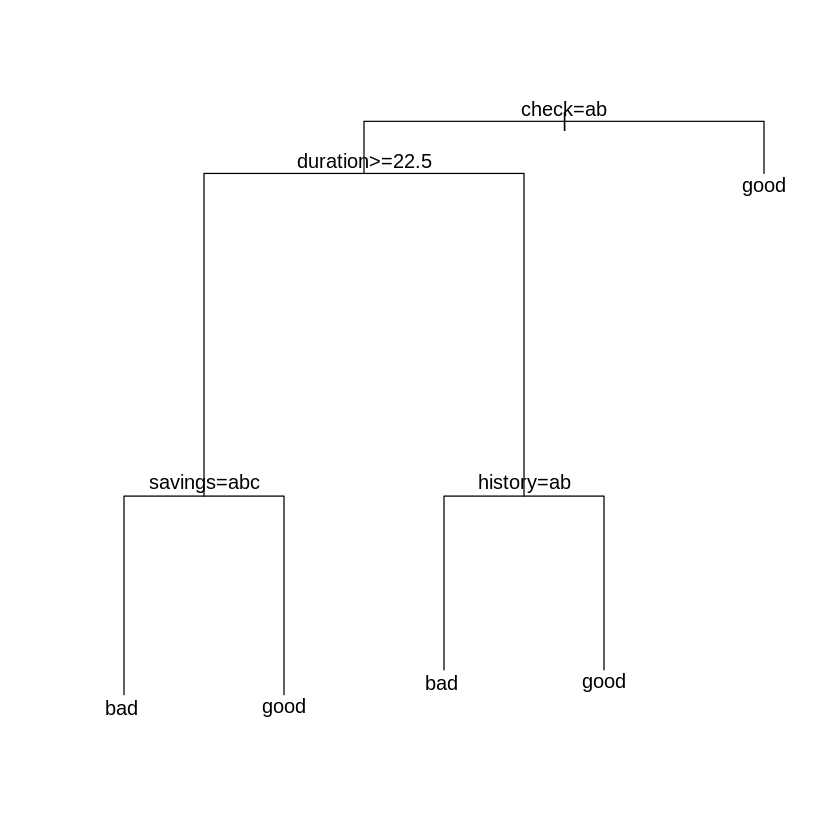

In [32]:
plot(fit.prun.tree)
text(fit.prun.tree)

In [45]:
# probabilities
p.test.tree = predict(fit.prun.tree, newdata=german.test, type="prob")

In [46]:
yhat.test.tree = ifelse(p.test.tree > threshold, levels(german$y)[2], levels(german$y)[1])

In [47]:
yhat.test.tree

,bad,good
1,bad,good
2,good,bad
3,bad,good
7,bad,good
10,good,bad
11,bad,good
12,good,bad
13,bad,good
14,good,bad
17,bad,good


In [51]:
tab = table(german.test$y, yhat.test.tree, dnn=c("Observed", "Predicted"))


NULL

ERROR: ignored